<h2 style="font-family:Comic Sans MS; color:#18B4FF; font-weight: bold; font-size: 70px">1.0 Import Libraries: </h2>


In [64]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor



# for model training
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# import model for regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# import tensorflow for creating neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# function for Sub-Heading
def heading(title):
    print('-'*80)
    print(title.upper())
    print('-'*80)

In [65]:
data = pd.read_csv('./googleplaystore.csv')
df = data.sample(6000, random_state=60)

--------------------------------------------------------------------------------
VISULALIZING THE MISSING VALUES IN THE DATASET
--------------------------------------------------------------------------------


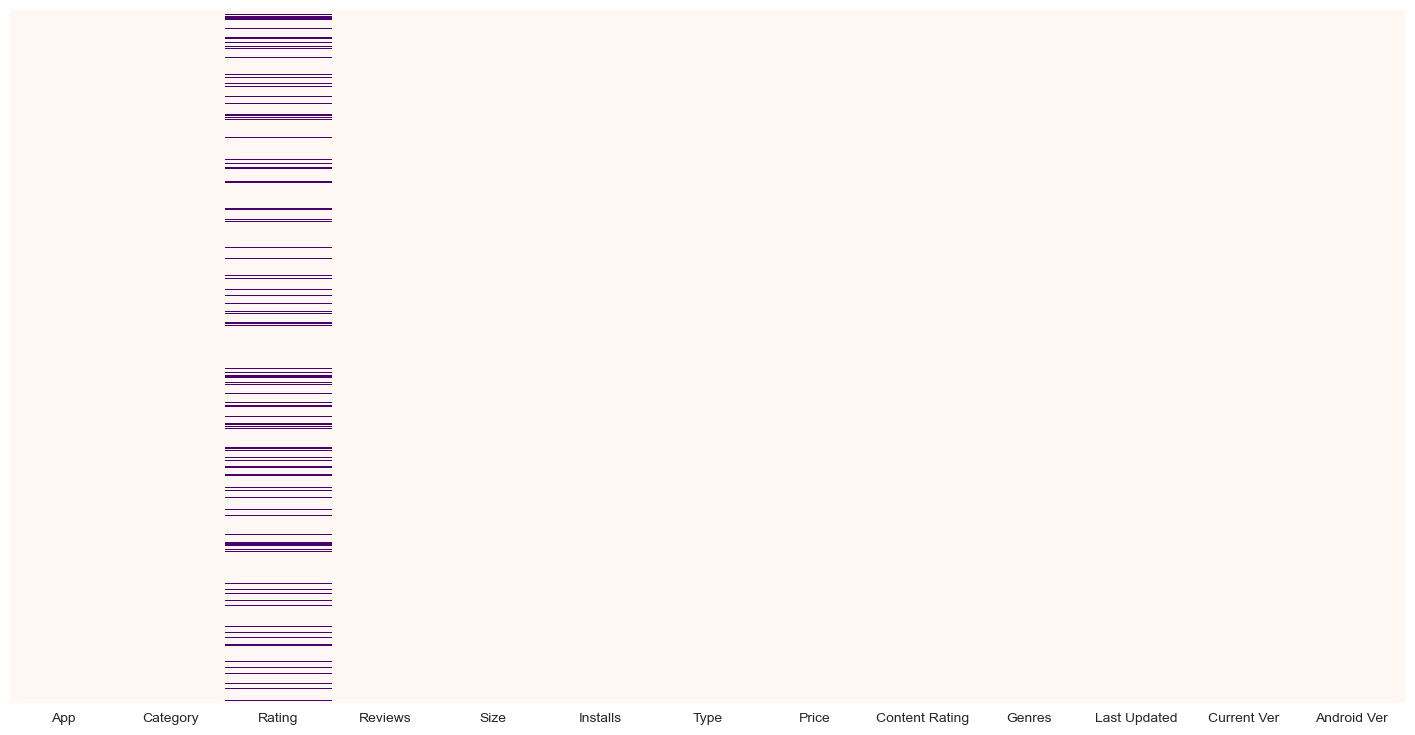

In [12]:
heading('visulalizing the missing values in the dataset')
# Set up the figure size for the plot
plt.figure(figsize=(18, 9))

# Create the heatmap to plot null values
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='RdPu')

# Show the plot
plt.show()

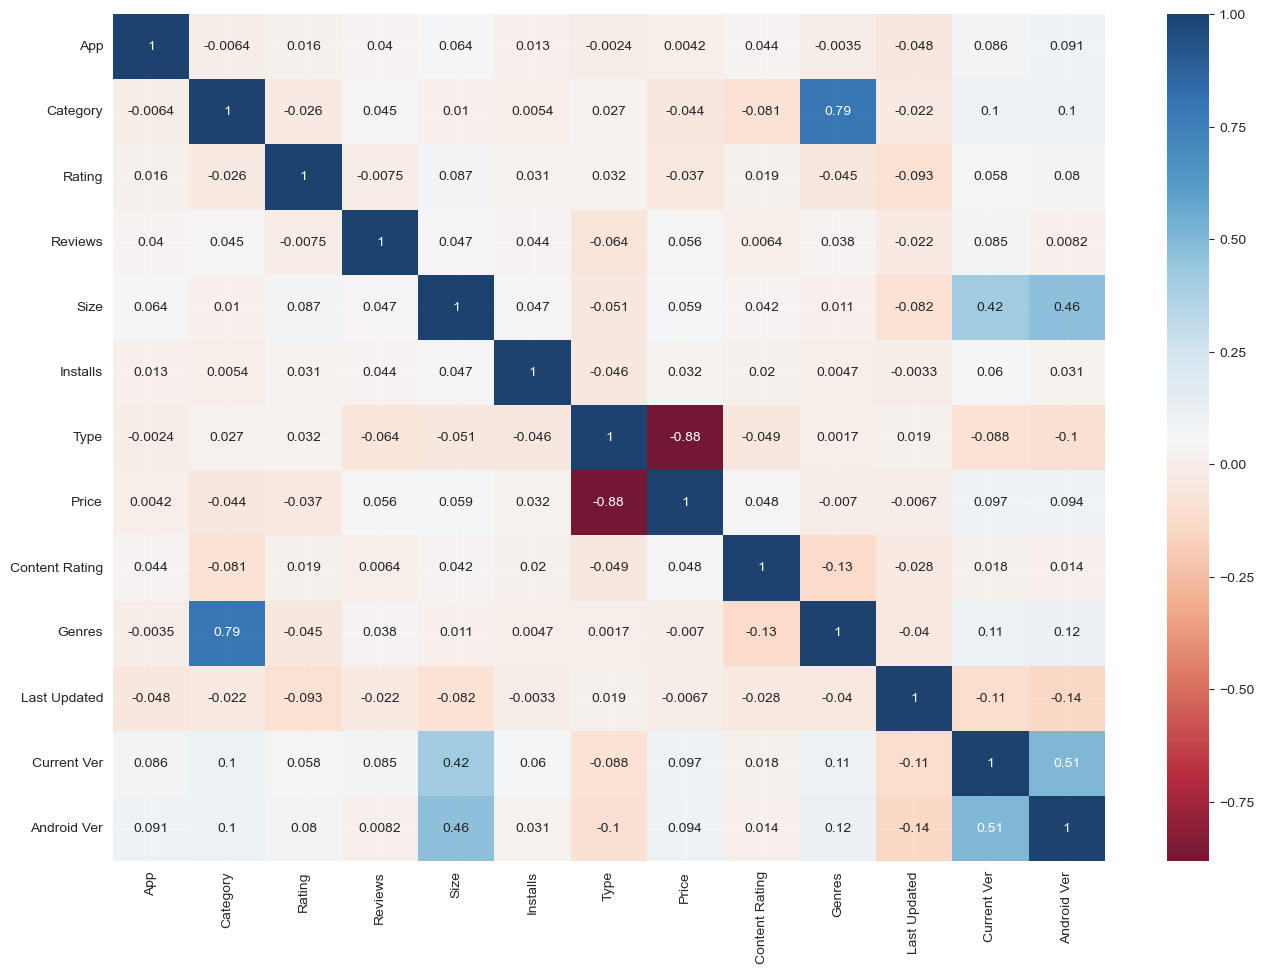

In [13]:
# Correlation Matrix
# Make a copy of the dataframe to avoid modifying the original data
df2 = df.copy()

# Convert categorical columns to numerical using label encoding
# Iterate over categorical columns and apply label encoding
cat_cols = df2.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])

# Calculate correlation matrix
correlation_matrix = df2.corr()

# Sort correlation features
sort_corr_features = correlation_matrix.index 

# Plot correlation matrix
plt.figure(figsize=(16, 11))
sns.heatmap(df2[sort_corr_features].corr(), annot=True, cmap='RdBu', alpha=0.9, square=False)
plt.show()


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">3.8: Conclusions</strong>

1. There are `4200 rows` and `13 columns` in the dataset.
2. There are `1 numeric` columns and `12 object(categorical)` columns in the dataset.
3. Only Rating and Current Ver column has NaN values.
3. Rating has `13.82%` missing values.
4. Current Ver has `0.045%` missing values.
5. Android Ver has `0.023` missing values.



<hr style="border: none; border-top: 2px solid #18B4FF;">


<h2 style="font-family:Comic Sans MS; color:#18B4FF; font-weight: bold; font-size: 70px">4.0 Data Cleaning and Preprocessing:</h2>

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">4.1 Dealing with Rating column</strong>

In [14]:
heading('Missing values before imputation')
df['Rating'].isnull().sum()

--------------------------------------------------------------------------------
MISSING VALUES BEFORE IMPUTATION
--------------------------------------------------------------------------------


577

In [15]:
# Initialize an IterativeImputer with XGBRegressor as estimator
impute = IterativeImputer(estimator=XGBRegressor(), max_iter=100, random_state=42)

# Impute missing values in the 'Rating' column using IterativeImputer
# The input to fit_transform should be a DataFrame, so we pass df[['Rating']] instead of df['Rating']
df['Rating'] = impute.fit_transform(df[['Rating']])

In [16]:
heading('Missing values after imputation')
# Check if there are any missing values in the 'Rating' column after imputation
df['Rating'].isnull().sum()

--------------------------------------------------------------------------------
MISSING VALUES AFTER IMPUTATION
--------------------------------------------------------------------------------


0

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">4.2 Dealing with Current Ver column</strong>

In [17]:
heading('Missing values before imputation')
# Check if there are any missing values in the 'Current Ver' column
df['Current Ver'].isnull().sum()

--------------------------------------------------------------------------------
MISSING VALUES BEFORE IMPUTATION
--------------------------------------------------------------------------------


3

In [18]:
# Fill missing values in the 'Current Ver' column with the mode
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

In [19]:
heading('Missing values after imputation')
# Check if there are any missing values in the 'Current Ver' column after imputation
df['Current Ver'].isnull().sum()

--------------------------------------------------------------------------------
MISSING VALUES AFTER IMPUTATION
--------------------------------------------------------------------------------


0

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">4.3 Dealing with Android Ver column</strong>

In [20]:
heading('Missing values before imputation')
df['Current Ver'].isnull().sum()

--------------------------------------------------------------------------------
MISSING VALUES BEFORE IMPUTATION
--------------------------------------------------------------------------------


0

In [21]:
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)

In [22]:
heading('Missing values after imputation')
df['Current Ver'].isnull().sum()

--------------------------------------------------------------------------------
MISSING VALUES AFTER IMPUTATION
--------------------------------------------------------------------------------


0

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">4.4 Dealing with Size column</strong>

In [23]:
heading("Number of app that have size in 'Kbs'")
kbs = df[df['Size'].str.endswith('k')]
print(kbs['Size'].value_counts().sum())

--------------------------------------------------------------------------------
NUMBER OF APP THAT HAVE SIZE IN 'KBS'
--------------------------------------------------------------------------------
123


In [24]:
# Filter apps whose size ends with 'k'
heading(
    "Number of apps that have size in 'Mbs'"
)
mbs = df[df['Size'].str.endswith('M')]
print(mbs['Size'].value_counts().sum())


--------------------------------------------------------------------------------
NUMBER OF APPS THAT HAVE SIZE IN 'MBS'
--------------------------------------------------------------------------------
3392


In [25]:
heading("No of columns thats size varies with device")
varies = df[df['Size'] == 'Varies with device']['Size'].value_counts().sum()
print(varies)

--------------------------------------------------------------------------------
NO OF COLUMNS THATS SIZE VARIES WITH DEVICE
--------------------------------------------------------------------------------
685


In [26]:
import pandas as pd
import numpy as np

# Define a function to convert size from string format to numerical values
def convert_size(convertings):
    """
    Convert size from string format to numerical values.
    
    Parameters:
        convertings (str): Size in string format (e.g., '10M', '20k', 'Varies with device').
        
    Returns:
        int or float: Size in kilobytes (KB).
    """
    if 'M' in convertings:
        # If size is in megabytes (M), convert to kilobytes (KB)
        return pd.to_numeric(convertings.replace('M', '')) * 1024
    elif 'k' in convertings:
        # If size is in kilobytes (k), convert to numeric value
        return pd.to_numeric(convertings.replace('k', ''))
    elif pd.isna(convertings):
        # If size is NaN (missing value), return NaN
        return np.nan
    elif 'Varies with device' in convertings:
        # If size varies with device, return NaN
        return np.nan
    else:
        # If size is in any other format, convert to numeric value
        return pd.to_numeric(convertings)
    
# Apply the function to preprocess the 'Size' column in the DataFrame
df['Size'] = df['Size'].apply(convert_size)

# Rename the 'Size' column to 'Size in Kbs'
df.rename(columns={'Size': 'Size in Kbs'}, inplace=True)


In [27]:

df2 = df.copy()

# Encode categorical columns using LabelEncoder
cat_cols = df2.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])

In [28]:
%%time
"""Using Random Forest Regressor to predict missing values in 'Size in Kbs'"""
# Separate data into missing and non-missing values
df2_missing = df2[df2['Size in Kbs'].isnull()]
df2_not_missing = df2[df2['Size in Kbs'].notnull()]

# Create feature matrix (X_train) and target vector (y_train) for non-missing data
X_train = df2_not_missing.drop(columns=['Size in Kbs'])
y_train = df2_not_missing['Size in Kbs']

# Select the model (Random Forest Regressor)
model = RandomForestRegressor()

# Choose the hyperparameters for the model
params = {'bootstrap': [True], 'max_depth': [None], 'min_samples_leaf':[2], 'min_samples_split': [5], 'n_estimators':[50, 100]}

# Note: The commented-out section below demonstrates a more extensive set of hyperparameters for grid search
# params = {
#     'n_estimators': [10, 50, 100],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# Find the best hyperparameters using Grid Search Cross Validation
grid_search = GridSearchCV(model, params, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_params = {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

# Initialize a new Random Forest Regressor model with the best hyperparameters
model = RandomForestRegressor(**best_params)

# Fit the model to the non-missing data
model.fit(X_train, y_train)

# Prepare feature matrix (X_missing) for predicting missing values
X_missing = df2_missing.drop(columns=['Size in Kbs'])

# Predict missing values using the trained model
predicted_missing_values = model.predict(X_missing)

# Calculate R-squared score to evaluate model performance on the non-missing data
r_2 = r2_score(y_train, model.predict(X_train))

# Replace missing values in the original dataset with the predicted values
df.loc[df['Size in Kbs'].isnull(), 'Size in Kbs'] = predicted_missing_values

# Print R-squared score and best parameters found during grid search
print(f'r2_score is {r_2}')
print(f'Best parameters are {best_params}')


KeyboardInterrupt: 

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">4.5: Dealing with Installs column</strong>

In [29]:
data = df.copy()

In [30]:
# Define a function to convert the 'Installs' column to numeric values
def convert(convertings):
    """
    Convert the 'Installs' column to numeric values.
    
    Parameters:
        convertings (str): String representation of installs.
        
    Returns:
        int: Numeric representation of installs.
    """
    # If the string contains a comma, remove the comma
    if ',' in convertings:
        return convertings.replace(',', '')
    # If the string contains a plus sign, remove the plus sign
    elif '+' in convertings:
        return convertings.replace('+', '')
    # If the string is in a numeric format, convert it to numeric
    else:
        return pd.to_numeric(convertings)

# Apply the 'convert' function to preprocess the 'Installs' column in the DataFrame 'data'
data['Installs'] = data['Installs'].apply(convert)


In [31]:
# Apply a lambda function to convert the 'Installs' column to numeric values
data['Installs'] = data['Installs'].apply(lambda x: pd.to_numeric(x.replace('+', '')))

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">4.6: Dealing with Price column</strong>

In [32]:
# Print a heading for the analysis
heading('Number of apps that are paid and free.')

# Initialize counters for apps with zero and non-zero prices
zero_price = 0
non_zero = 0

# Iterate through the 'Price' column in the DataFrame 'data'
for i in data['Price']:
    # If the price is '0', increment the counter for zero-priced apps
    if i == '0':
        zero_price += 1
    # If the price is not '0', increment the counter for non-zero-priced apps
    elif i != '0':
        non_zero += 1

# Print the total number of apps with zero price
print(f'Number of apps that have zero price is {zero_price}')
# Print the total number of paid apps (non-zero price)
print(f'Number of apps that are paid: {non_zero}')


--------------------------------------------------------------------------------
NUMBER OF APPS THAT ARE PAID AND FREE.
--------------------------------------------------------------------------------
Number of apps that have zero price is 3894
Number of apps that are paid: 306


In [33]:
# Define a function to convert the 'Price' column to numeric values
def convertings(convert):
    """
    Convert the 'Price' column to numeric values.
    
    Parameters:
        convert (str): String representation of price.
        
    Returns:
        float: Numeric representation of price.
    """
    # If the price is '0', convert it to numeric
    if convert == '0':
        return pd.to_numeric(convert.replace('0', '0'))
    # If the price contains a dollar sign ($), remove it and convert to numeric
    elif '$' in convert:
        return pd.to_numeric(convert.replace('$', ''))

# Apply the 'convertings' function to preprocess the 'Price' column in the DataFrame 'data'
data['Price'] = data["Price"].apply(convertings)


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">4.7: Dealing with Reviews column</strong>

In [34]:
# converting reviews column to numeric type
data['Reviews'] = data['Reviews'].apply(lambda x: pd.to_numeric(x.replace("'", '') if "'" in x else x))

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">4.8: Dealing with unnecessary columns</strong>

In [35]:
# dropping 'Last Updated', 'Current Ver' and 'Android Ver' columns
data.drop(columns=['Last Updated', 'Current Ver', 'Android Ver', 'Content Rating'], inplace=True)

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">4.9: Dealing with duplicates</strong>

In [36]:
heading('Number of duplicates before removing')
# count the number of duplicates in the dataset
dups = data.duplicated(subset="App").value_counts()[True]
# print the number of duplicates
print(f'There are {dups} duplicates in the dataset.')

--------------------------------------------------------------------------------
NUMBER OF DUPLICATES BEFORE REMOVING
--------------------------------------------------------------------------------
There are 230 duplicates in the dataset.


In [37]:
# dropping duplicates based on 'App'
data.drop_duplicates(subset='App', inplace=True)

In [38]:
heading(f'Number of duplicates after removing')
# count the number of duplicates in the dataset after removing
dps = data.duplicated(subset="App").sum()
print(f'There are {dps} duplicates in the dataset')

--------------------------------------------------------------------------------
NUMBER OF DUPLICATES AFTER REMOVING
--------------------------------------------------------------------------------
There are 0 duplicates in the dataset


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">4.10: Data after preprocessing and imputation</strong>

In [39]:
data.head()

,App,Category,Rating,Reviews,Size in Kbs,Installs,Type,Price,Genres
3457,Microsoft Outlook,PRODUCTIVITY,4.300000,3252896,51200.0,100000000,Free,0.00,Productivity
3069,FotMob - Live Soccer Scores,SPORTS,4.700000,410395,NaN,10000000,Free,0.00,Sports
9657,EO Guide,HEALTH_AND_FITNESS,4.188131,15,24576.0,1000,Paid,4.99,Health & Fitness
10714,FunForMobile Ringtones & Chat,SOCIAL,4.400000,68358,7372.8,5000000,Free,0.00,Social
3963,Oral-B App,HEALTH_AND_FITNESS,3.300000,14210,98304.0,1000000,Free,0.00,Health & Fitness


--------------------------------------------------------------------------------
VISUALIZING THE MISSING VALUES IN THE DATASET
--------------------------------------------------------------------------------


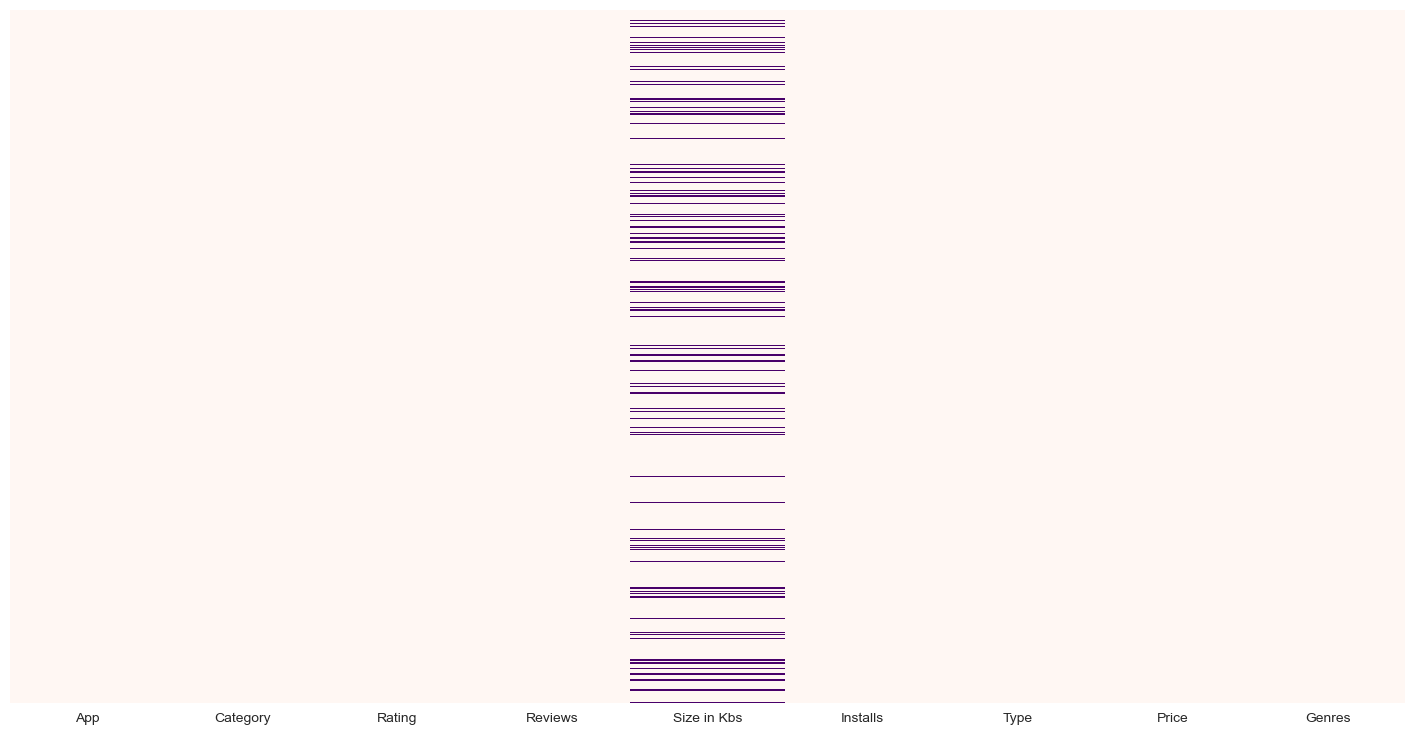

In [40]:
# Print a heading for the visualization
heading('Visualizing the missing values in the dataset')

# Set up the figure size for the plot
plt.figure(figsize=(18, 9))

# Create a heatmap to visualize missing values in the dataset
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='RdPu')

# Show the plot
plt.show()

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">4.11: Conclusion</strong>

1. Imputation of Missing Values in 'Ratings' Column: 
   - Missing values in the `'Ratings'` column were imputed using the `IterativeImputer` algorithm along with the `XGBRegressor` estimator.

2. Imputation of Missing Values in 'Size' Column: 
   - The `RandomForestRegressor` model was employed to impute missing values in the `'Size'`column. The imputation process achieved an `R-squared score of 0.83`, indicating a satisfactory fit of the imputed values to the observed data.

3. Conversion of Categorical Columns to Numeric:
   - A custom function was utilized to preprocess the data, specifically to `remove alphabetical signs` from categorical columns. However, further clarification is required regarding the exact approach used for converting categorical columns to numeric representation. 


<hr style="border: none; border-top: 2px solid #18B4FF;">


<h2 style="font-family:Comic Sans MS; color:#18B4FF; font-weight: bold; font-size: 70px">5.0 Column Exploration:</h2>

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.1: Ratings Column</strong>

In [41]:
df = data.copy()

--------------------------------------------------------------------------------
CHECKING THE RATINGS OF THE APPS
--------------------------------------------------------------------------------
The number of apps that have 5-star ratings are 109
The number of apps that have ratings between 4 to 5 stars are 3104
The number of apps that have ratings less than 3 stars are 757


Text(0, 0.5, 'Count')

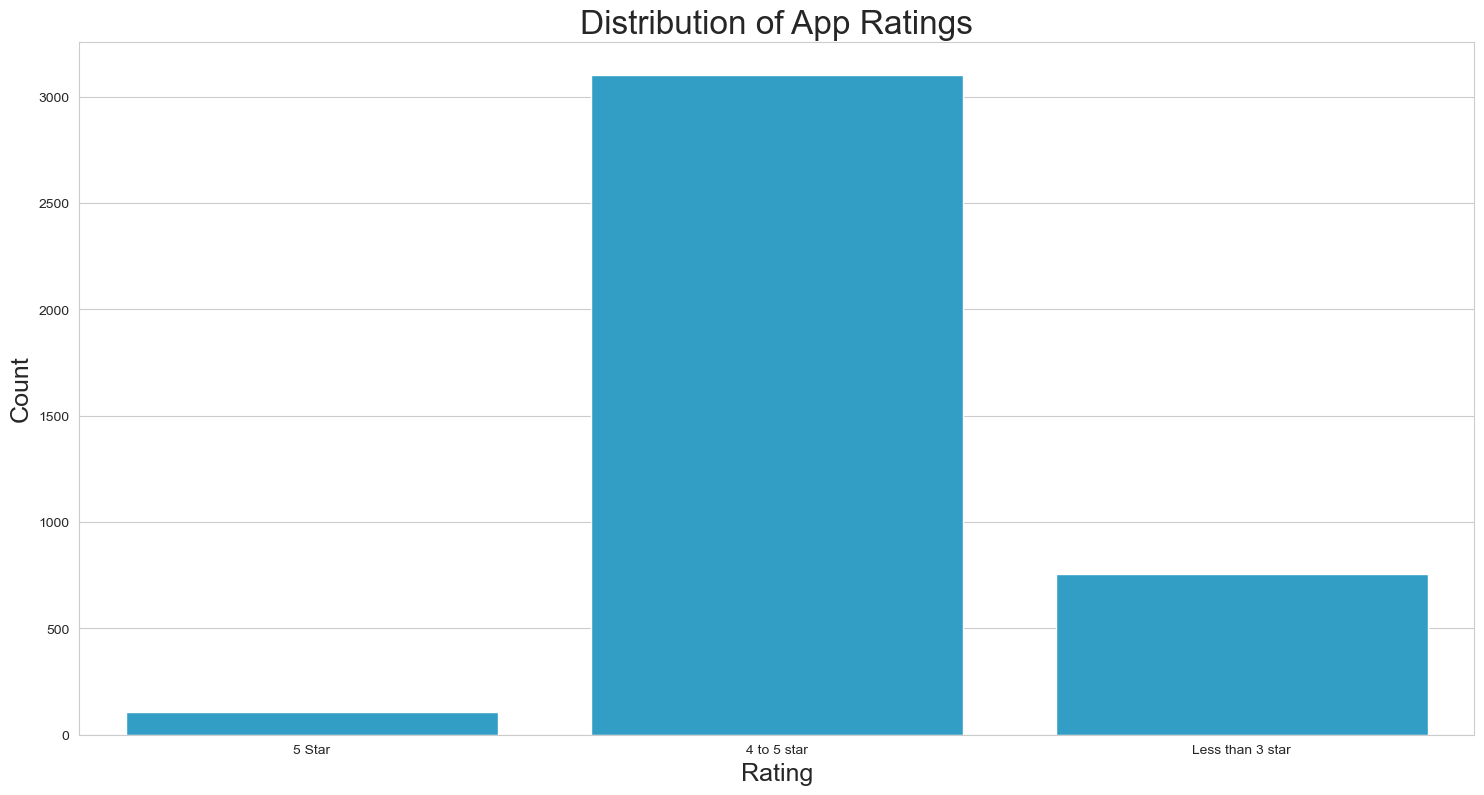

In [42]:
# Print a heading for the analysis
heading('Checking the ratings of the apps')

# Initialize variables to store the count of different rating categories
count_5 = 0  # for 5 star
count_4_5 = 0  # for 4 to 5 star
count_3 = 0  # for 3 star

# Iterate through the 'Rating' column to count ratings in different categories
for i in df['Rating']: 
    if i == 5.0:  # condition for 5 star
        count_5 += 1  # increment the count
    elif i >= 4 and i < 5:  # condition for 4 to 5 star
         count_4_5 += 1  # increment the count
    elif i < 4:  # condition for less than 3 star
        count_3 += 1  # increment the count

# Printing the results
print(f'The number of apps that have 5-star ratings are {count_5}')
print(f'The number of apps that have ratings between 4 to 5 stars are {count_4_5}')
print(f'The number of apps that have ratings less than 3 stars are {count_3}')

# Create a DataFrame to store the counts for each rating category
dfx = pd.DataFrame(
    {
        'num': ['5 Star', '4 to 5 star', 'Less than 3 star'], 
        'count': [count_5, count_4_5, count_3]
    }
)

# Set the aesthetic style of the plots
plt.figure(figsize=(18, 9))
sns.set_style("whitegrid")

# Create a bar plot to visualize the distribution of app ratings
sns.barplot(x=dfx['num'], y=dfx['count'], color='#19AADE')
plt.title('Distribution of App Ratings', fontsize=24)
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Count', fontsize=18)


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.2: Reviews Column</strong>

In [43]:
# Print a heading for the analysis
heading("Reviews of 5-star rated apps")

# Calculate the median and mean number of reviews for 5-star rated apps
rev_median = df[df['Rating'] == 5.0]['Reviews'].median()
rev_mean = df[df['Rating'] == 5.0]['Reviews'].mean()

# Print the median and mean number of reviews for 5-star rated apps
print(f'Most 5-star rated apps have reviews: {rev_median:.2f}')
print(f'The average number of reviews of 5-star rated apps is {rev_mean:.2f}')

--------------------------------------------------------------------------------
REVIEWS OF 5-STAR RATED APPS
--------------------------------------------------------------------------------
Most 5-star rated apps have reviews: 4.00
The average number of reviews of 5-star rated apps is 8.62


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.3: Size Column</strong>

In [44]:
# Print a heading for the analysis
heading("Size of 5-star rated apps")

# Calculate the median and mean size of 5-star rated apps
size_median_kb = df[df['Rating'] == 5.0]['Size in Kbs'].median()
size_mean_kb = df[df['Rating'] == 5.0]['Size in Kbs'].mean()

# Print the median and mean size of 5-star rated apps in megabytes (MB)
print(f'Most 5-star rated apps have a size: {np.round(size_median_kb / 1024, 2)} MB')
print(f'The average size of 5-star rated apps is {np.round(size_mean_kb / 1024, 2)} MB')

--------------------------------------------------------------------------------
SIZE OF 5-STAR RATED APPS
--------------------------------------------------------------------------------
Most 5-star rated apps have a size: 9.3 MB
The average size of 5-star rated apps is 16.59 MB


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.4: Type of 5-star Rated apps</strong>

Number of 5-star apps that are free is 95 and number of 5-star apps that are paid is 14


Text(0, 0.5, 'Count')

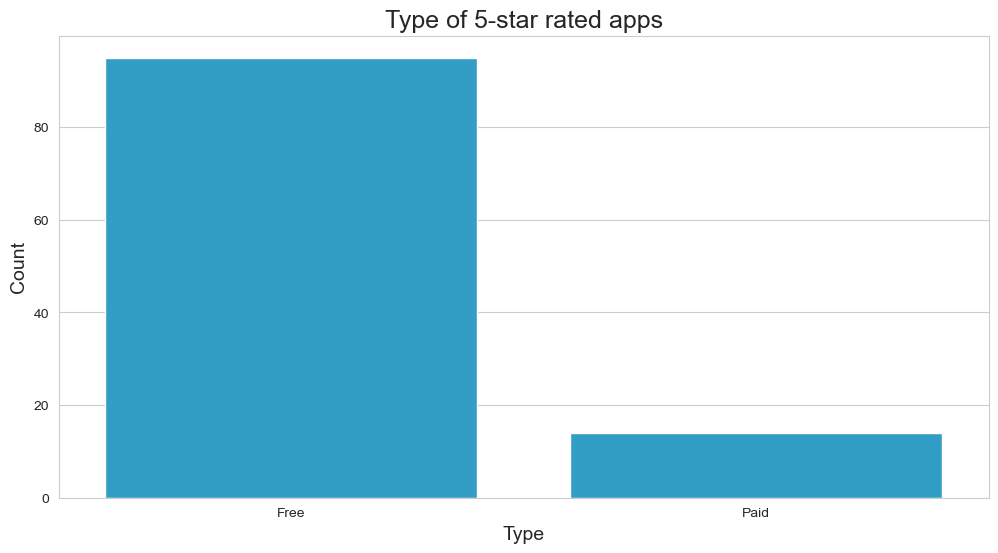

In [45]:
# Count the number of 5-star rated apps that are free and paid
rev_type = df[df['Rating'] == 5.0]['Type'].value_counts()

# Print the count of free and paid 5-star rated apps
print(f'Number of 5-star apps that are free is {rev_type[0]} and number of 5-star apps that are paid is {rev_type[1]}')

# Plot the type of 5-star rated apps
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid") # Set the aesthetic style of the plots
sns.set_palette("pastel")

# Create a count plot to visualize the type of 5-star rated apps
sns.countplot(x='Type', data=df[df['Rating'] == 5.0], color='#19AADE')

# Set the title and labels of the plot
plt.title('Type of 5-star rated apps', fontsize=18)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.5: Category of 5-star apps</strong>

--------------------------------------------------------------------------------
CATEGORY OF 5-STAR APPS
--------------------------------------------------------------------------------


Text(0, 0.5, 'Category')

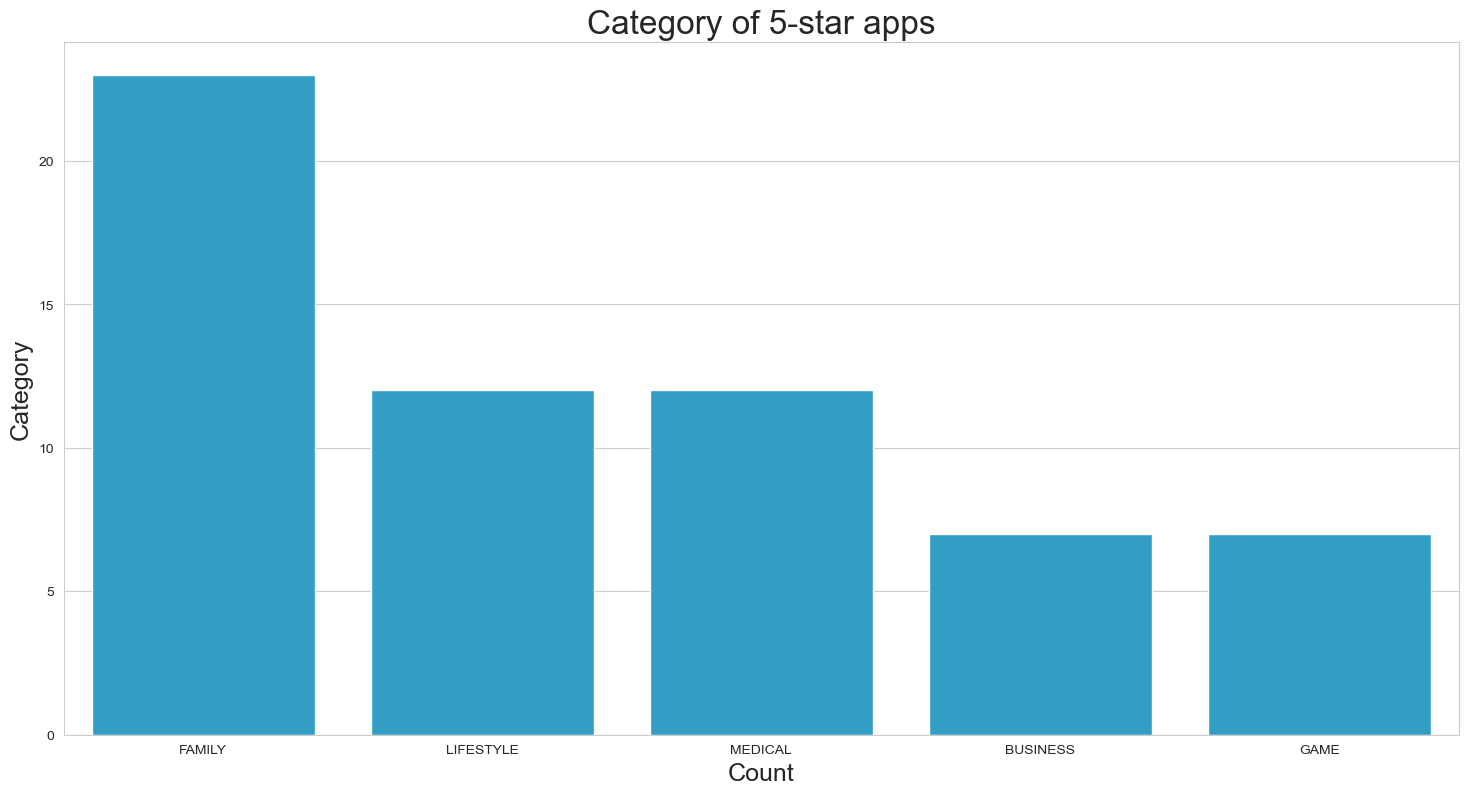

In [46]:
# check the category of 5-star apps
heading('Category of 5-star apps')
cat = df[df['Rating'] == 5.0]['Category'].value_counts().sort_values(ascending=False).head(5)
cat
# plot the category of 5-star apps usign sns
plt.figure(figsize=(18, 9))
sns.barplot(y=cat.values, x=cat.index, color='#19AADE')
plt.title('Category of 5-star apps', fontsize=24)
plt.xlabel('Count', fontsize=18)
plt.ylabel('Category', fontsize=18)

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.6: Reviews of those app that have ratings between 4 to 5 stars</strong>

In [47]:
# Calculate the average and median number of reviews for apps with ratings between 4 and 5
rev_4_5_mean = df[(df['Rating'] >= 4) & (df['Rating'] < 5)]['Reviews'].mean()
rev_4_5_med = df[(df['Rating'] >= 4) & (df['Rating'] < 5)]['Reviews'].median()

# Print the average and median number of reviews for apps with ratings between 4 and 5
print(f'The average number of reviews of apps with ratings between 4 to 5 is {np.round(rev_4_5_mean, 2)}')
print(f'The median number of reviews of apps with ratings between 4 to 5 is {np.round(rev_4_5_med, 2)}')


The average number of reviews of apps with ratings between 4 to 5 is 423292.76
The median number of reviews of apps with ratings between 4 to 5 is 4217.5


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.7: Size of those app that have ratings between 4 to 5 stars</strong>

In [48]:
# Print a heading for the analysis
heading('Size of Apps with Ratings Between 4 to 5')

# Calculate the average and median size of apps with ratings between 4 and 5
size_4_5_mean = df[(df['Rating'] >= 4) & (df['Rating'] < 5)]['Size in Kbs'].mean()
size_4_5_median = df[(df['Rating'] >= 4) & (df['Rating'] < 5)]['Size in Kbs'].median()

# Print the average and median size of apps with ratings between 4 and 5
print(f'The average size of apps with ratings between 4 to 5 is {np.round(size_4_5_mean / 1024, 2)} MB')
print(f'The median size of apps with ratings between 4 to 5 is {np.round(size_4_5_median / 1024, 2)} MB')


--------------------------------------------------------------------------------
SIZE OF APPS WITH RATINGS BETWEEN 4 TO 5
--------------------------------------------------------------------------------
The average size of apps with ratings between 4 to 5 is 21.84 MB
The median size of apps with ratings between 4 to 5 is 13.0 MB


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.8: Type of those app that have ratings between 4 to 5 stars</strong>

Number of free apps that have reting between 4 to 5 is 2863 and number of paid apps that have reting between 4 to 5 is 241


Text(0, 0.5, 'Count')

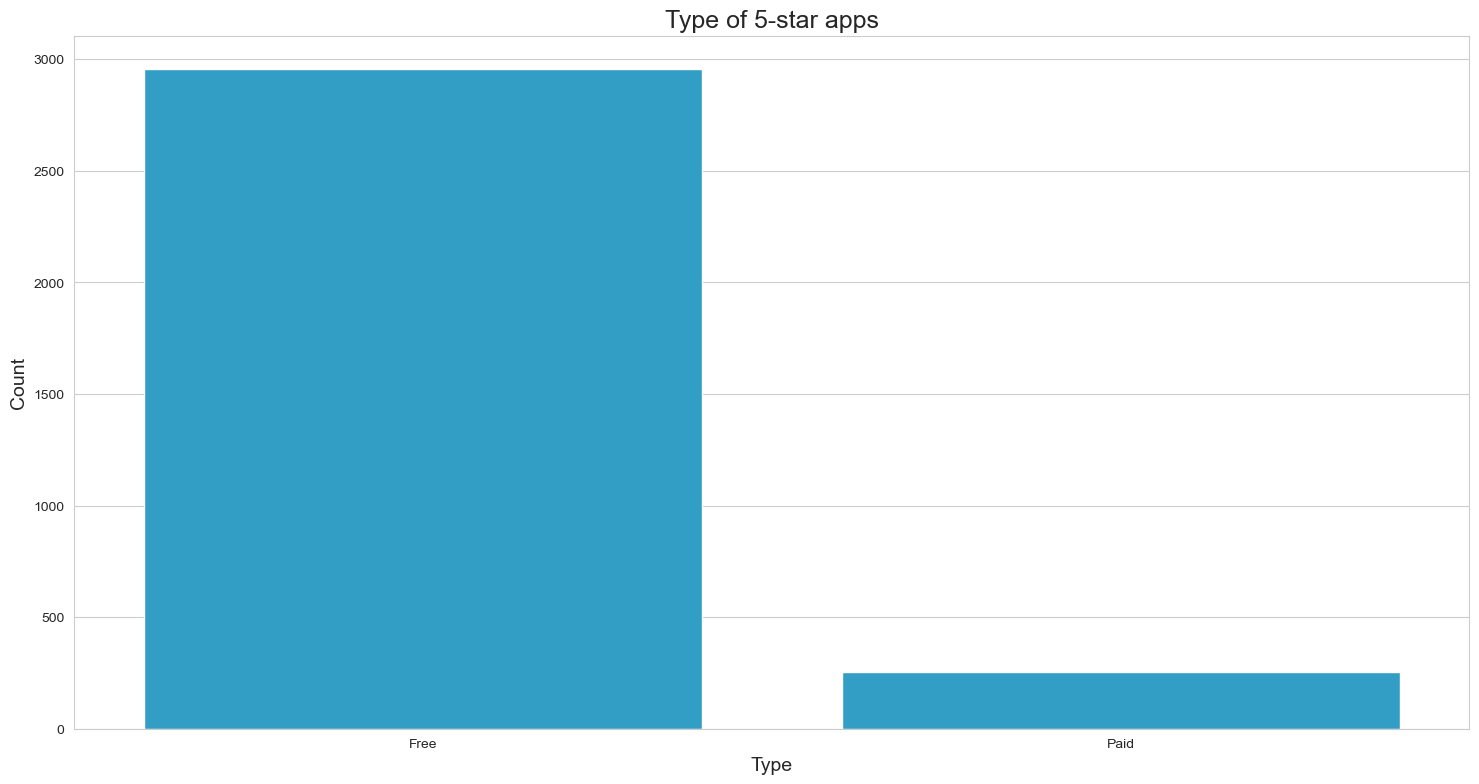

In [49]:
type_4_5 = df[(df['Rating'] >=4) & (df['Rating'] < 5)]['Type'].value_counts()
print(f'Number of free apps that have reting between 4 to 5 is {type_4_5[0]} and number of paid apps that have reting between 4 to 5 is {type_4_5[1]}')

# plot the type of 5-star apps
plt.figure(figsize=(18, 9))
sns.countplot(data=df[(df['Rating'] >=4) & (df['Rating'] <= 5.0)], color='#19AADE', x='Type')
plt.title('Type of 5-star apps', fontsize=18)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.9: Reviews of those app that have ratings less than 3</strong>

In [50]:
# Filter the dataset for apps with ratings less than 3
rev_le_3 = df[df['Rating'] < 3]

# Calculate the mean and median number of reviews for apps with ratings less than 3
rev3_mean = rev_le_3['Reviews'].mean()
rev3_median = rev_le_3['Reviews'].median()

# Print the results
print(f'The average number of reviews for apps with ratings less than 3 is {np.round(rev3_mean, 2)}')
print(f'The median number of reviews for apps with ratings less than 3 is {np.round(rev3_median, 2)}')


The average number of reviews for apps with ratings less than 3 is 486.45
The median number of reviews for apps with ratings less than 3 is 74.0


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.10: Size of those app that have ratings less than 3</strong>

In [51]:
# Calculate the average and median size of apps that have a rating less than 3
siz_le_3_mean = df[df['Rating'] < 3]['Size in Kbs'].mean()
siz_le_3_med = df[df['Rating'] < 3]['Size in Kbs'].median()

# Print the results
print(f'The average size of apps that have a rating less than 3 is {np.round(siz_le_3_mean / 1024, 2)}Mbs')
print(f'The median size of apps that have a rating less than 3 is {np.round(siz_le_3_med / 1024, 2)}Mbs')


The average size of apps that have a rating less than 3 is 17.73Mbs
The median size of apps that have a rating less than 3 is 9.0Mbs


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.11: Type of those app that have ratings less than 3</strong>

Number of free apps that have a rating less than 3 is 99 and number of paid apps that have a rating less than 3 is 10


Text(0, 0.5, 'Count')

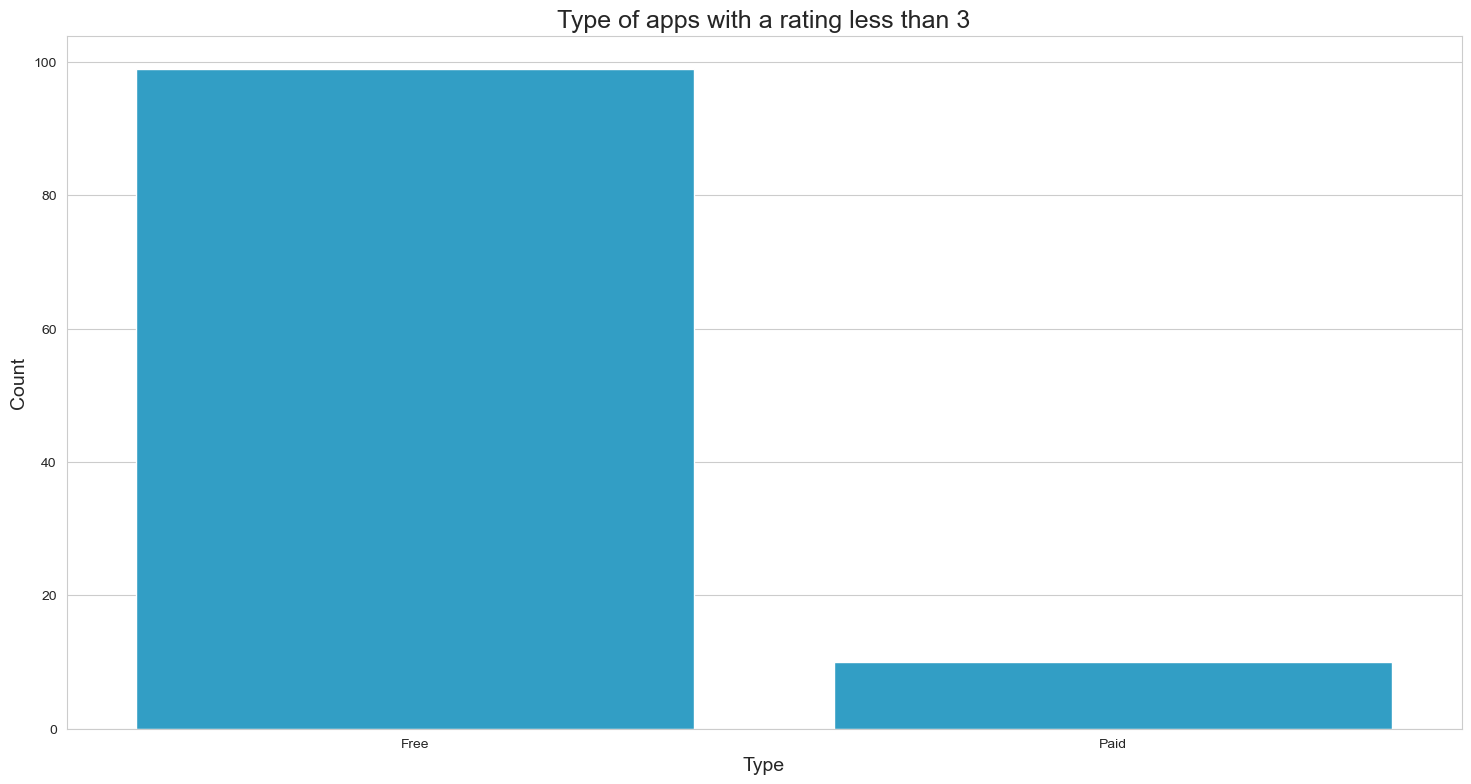

In [52]:
# Count the number of free and paid apps that have a rating less than 3
typ = df[df["Rating"] < 3]['Type'].value_counts()
print(f'Number of free apps that have a rating less than 3 is {typ[0]} and number of paid apps that have a rating less than 3 is {typ[1]}')

# Plot the count of free and paid apps with a rating less than 3
plt.figure(figsize=(18, 9))
sns.countplot(data=df[(df['Rating'] < 3)], color='#19AADE', x='Type')
plt.title('Type of apps with a rating less than 3', fontsize=18)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Count', fontsize=14)


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.12: Top 10 most installed apps with their categories</strong>

--------------------------------------------------------------------------------
TOP 10 APPS WITH THE HIGHEST NUMBER OF INSTALLS WITH THEIR CATEGORIES
--------------------------------------------------------------------------------


Text(0, 0.5, 'Installs')

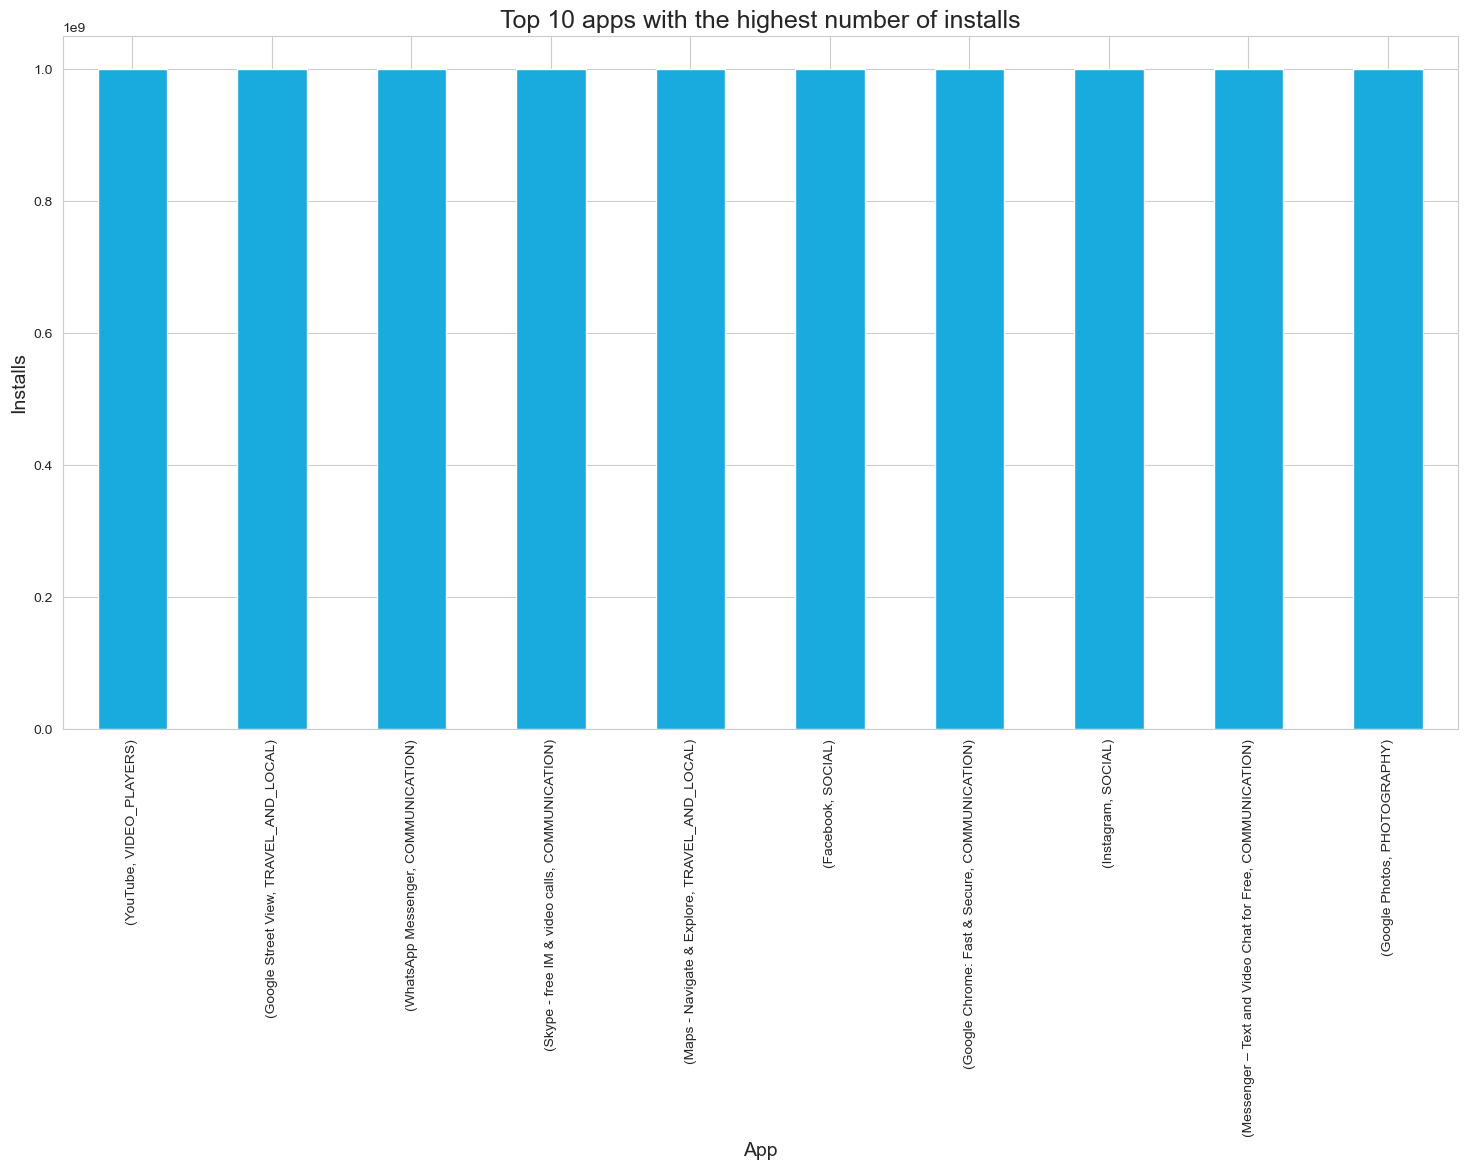

In [53]:
heading('Top 10 apps with the highest number of installs with their categories')
df.groupby(['App', 'Category'])['Installs'].max().sort_values(ascending=False).head(10)

# plot the top 10 apps with the highest number of installs
df.groupby(['App', 'Category'])['Installs'].max().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(18, 9), color='#19AADE')
plt.title('Top 10 apps with the highest number of installs', fontsize=18)
plt.xlabel('App', fontsize=14)
plt.ylabel('Installs', fontsize=14)

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.13: Top 10 apps with the greatest size</strong>

In [54]:
heading('Top 10 apps with the greatest size')

# sort  the install colum
sort = df.sort_values(by='Size in Kbs', ascending=False)

sort['Size in Kbs'] = sort['Size in Kbs'].apply(lambda x: np.round(x/1000, 2))
# select the top 10 apps with the greatest size 
sort.groupby(['App', 'Category'])['Size in Kbs'].max().sort_values(ascending=False).head(10).apply(lambda x: f'{x} Mbs')

--------------------------------------------------------------------------------
TOP 10 APPS WITH THE GREATEST SIZE
--------------------------------------------------------------------------------


App                                Category 
Hungry Shark Evolution             GAME          102.4 Mbs
Mini Golf King - Multiplayer Game  GAME          102.4 Mbs
Miami crime simulator              GAME          102.4 Mbs
Navi Radiography Pro               MEDICAL       102.4 Mbs
Draft Simulator for FUT 18         SPORTS        102.4 Mbs
Ultimate Tennis                    SPORTS        102.4 Mbs
Gangster Town: Vice District       FAMILY        102.4 Mbs
Talking Babsy Baby: Baby Games     LIFESTYLE     102.4 Mbs
L.A. Crime Stories Mad City Crime  GAME         101.38 Mbs
Earn to Die 2                      GAME         101.38 Mbs
Name: Size in Kbs, dtype: object

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.14: Top 10 apps with the highest number of reviews</strong>

In [55]:
heading('Top 10 apps with highest number of reviews')
# select the top 10 apps with the highest number of reviews
df.groupby(['App', 'Category'])['Reviews'].max().sort_values(ascending=False).head(10)

--------------------------------------------------------------------------------
TOP 10 APPS WITH HIGHEST NUMBER OF REVIEWS
--------------------------------------------------------------------------------


App                                                 Category     
Facebook                                            SOCIAL           78158306
WhatsApp Messenger                                  COMMUNICATION    69119316
Instagram                                           SOCIAL           66577313
Messenger – Text and Video Chat for Free            COMMUNICATION    56642847
Clash of Clans                                      GAME             44891723
YouTube                                             VIDEO_PLAYERS    25623548
Security Master - Antivirus, VPN, AppLock, Booster  TOOLS            24900999
Clash Royale                                        GAME             23133508
Candy Crush Saga                                    GAME             22426677
UC Browser - Fast Download Private & Secure         COMMUNICATION    17712922
Name: Reviews, dtype: int64

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.15: Top 5 categories with the highest number of apps</strong>

In [56]:
heading('Top 5 categories with the highest number of apps')
df['Category'].value_counts().head()

--------------------------------------------------------------------------------
TOP 5 CATEGORIES WITH THE HIGHEST NUMBER OF APPS
--------------------------------------------------------------------------------


Category
FAMILY      719
GAME        422
TOOLS       320
MEDICAL     176
BUSINESS    154
Name: count, dtype: int64

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.16: Categories with the highest number of installs</strong> debug

In [57]:
# top 8 categories with their install
df.groupby(['Category'])['Installs'].max().sort_values(ascending=False).head(8)

Category
FAMILY              1000000000
SOCIAL              1000000000
VIDEO_PLAYERS       1000000000
PHOTOGRAPHY         1000000000
PRODUCTIVITY        1000000000
TRAVEL_AND_LOCAL    1000000000
COMMUNICATION       1000000000
GAME                 500000000
Name: Installs, dtype: int64

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.17: Categories with the highest number of ratings</strong>

In [58]:
# top 8 categories with their rating
df.groupby(['Category'])['Rating'].max().sort_values(ascending=False).head(8)

Category
ART_AND_DESIGN        5.0
FOOD_AND_DRINK        5.0
SOCIAL                5.0
SHOPPING              5.0
PRODUCTIVITY          5.0
PHOTOGRAPHY           5.0
PERSONALIZATION       5.0
NEWS_AND_MAGAZINES    5.0
Name: Rating, dtype: float64

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">5.18: Number of free and paid app in the dataset</strong>

--------------------------------------------------------------------------------
NUMBER OF FREE AND PAID APP IN THE DATASET
--------------------------------------------------------------------------------
Number of free apps is 3668 and number of paid apps is 302
The percentage of paid apps in the dataset is 7.61%


Text(0, 0.5, 'Count')

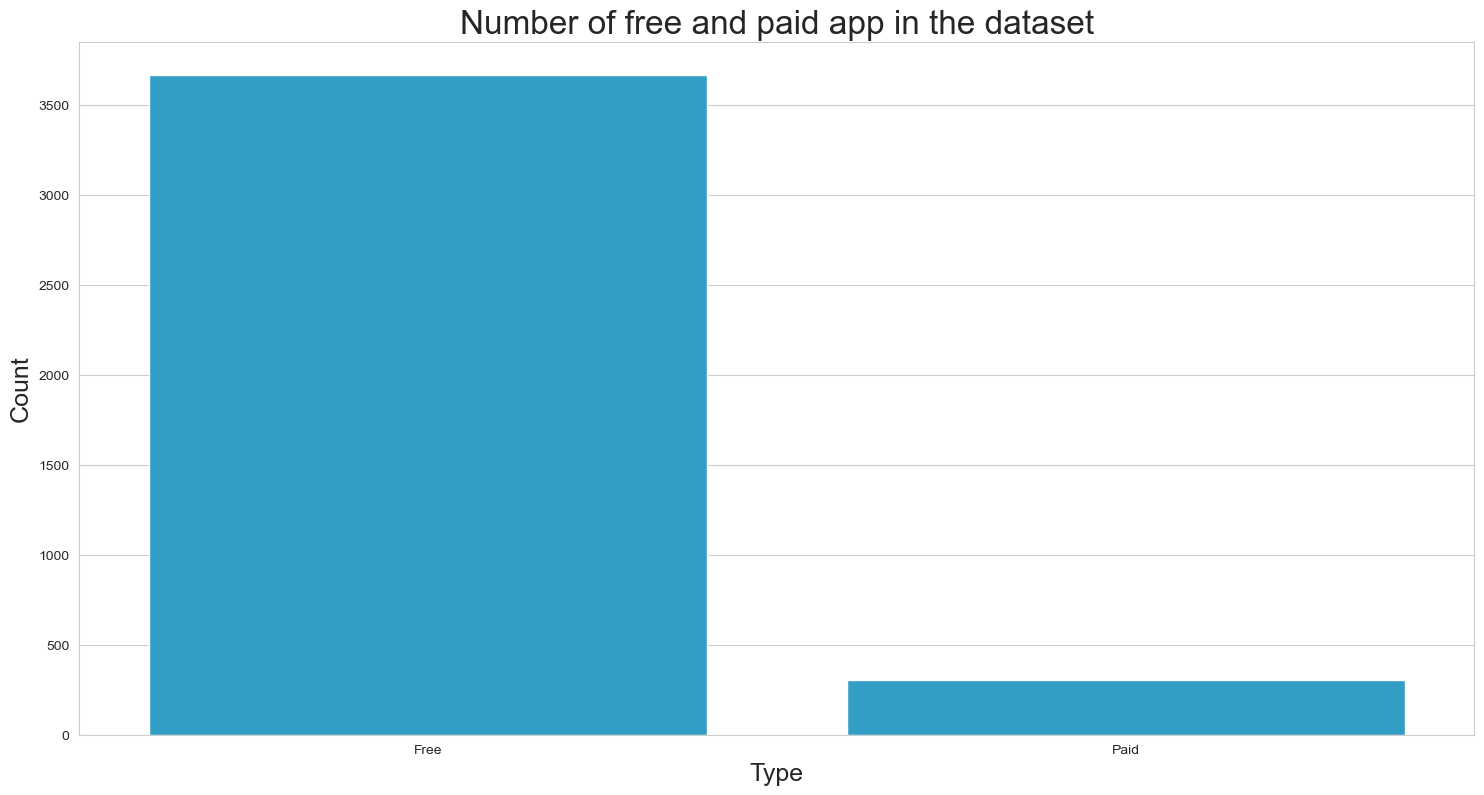

In [59]:
heading('Number of free and paid app in the dataset')
# number of free and paid apps
ty = df['Type'].value_counts()
print(f'Number of free apps is {ty[0]} and number of paid apps is {ty[1]}')

# percentage of paid apps in the dataset
print(f'The percentage of paid apps in the dataset is {round(ty[1]/(ty[0]+ty[1])*100, 2)}%')

plt.figure(figsize=(18, 9))
sns.barplot(x = ty.index, y=ty.values, color='#19AADE')
plt.title('Number of free and paid app in the dataset', fontsize=24)
plt.xlabel('Type', fontsize=18)
plt.ylabel('Count', fontsize=18)

<hr style="border: none; border-top: 2px solid #18B4FF;">


<h2 style="font-family:Comic Sans MS; color:#18B4FF; font-weight: bold; font-size: 70px">6.0 Machine Learning:</h2>

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">6.1: Train Test Split</strong>

In [60]:
# Split the DataFrame into features (X) and target variable (y)
X = df.drop(columns=['Rating'])  # Features (all columns except 'Rating')
y = df['Rating']  # Target variable ('Rating')

# Split the data into training and testing sets
# test_size=0.2 specifies that 20% of the data will be used for testing
# random_state=42 sets the random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">6.2: Model Selection</strong>

In [61]:
model = {
    'XGBRegressor': {
        'model': XGBRegressor(),  # XGBRegressor model instance
        'params': {  # Dictionary of hyperparameters for XGBRegressor
            'model__n_estimators': [100, 500],  # Number of boosting rounds
            'model__max_depth': [3]  # Maximum depth of trees
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(),  # GradientBoostingRegressor model instance
        'params': {  # Dictionary of hyperparameters for GradientBoostingRegressor
            'model__loss': ['ls', 'quantile'],  # Loss function to be optimized
            'model__criterion': ['friedman_mse']  # Splitting criterion
        }
    },
}


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">6.3: Column Transformer for Encoding and Normalizing the data</strong>

In [62]:
# ColumnTransformer for encoding categorical variables and passing through numerical variables
tr1 = ColumnTransformer([
    ('ordinal_encoder', OrdinalEncoder(), ['Type']),  # Encode 'Type' column using OrdinalEncoder
    ('OneHot_Encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['App', 'Category', 'Genres'])  # One-hot encode 'App', 'Category', and 'Genres' columns
], remainder='passthrough')  # Pass through remaining columns as they are

# ColumnTransformer for applying QuantileTransformer to numerical variables and passing through categorical variables
tr2 = ColumnTransformer([
    ('Quantile_Transformer', QuantileTransformer(output_distribution='normal'), [2, 3, 4, 5, 7])  # Apply QuantileTransformer to columns 2, 3, 4, 5, and 7
], remainder='passthrough')  # Pass through remaining columns as they are


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse_output'

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">6.4: Model Training and Evaluation</strong>

In [ ]:
%%time

# Initialize lists to store model names and evaluation metrics
model_names = []
r2_scores = []
mean_absolute_errors = []
mean_squared_errors = []

# Iterate over each model in the `model` dictionary
for model_name, mp in model.items():
    # Create a pipeline for the current model
    pipe = Pipeline([
        ('tr1', tr1),  # Apply the first ColumnTransformer for data preprocessing
        ('tr2', tr2),  # Apply the second ColumnTransformer for data preprocessing
        ('model', mp['model'])  # Add the model to the pipeline
    ])
    
    # Perform grid search cross-validation to tune hyperparameters
    grid = GridSearchCV(pipe, mp['params'], cv=5, verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = grid.predict(X_test)
    
    # Evaluate the model performance using various metrics
    r2 = r2_score(y_test, y_pred)  # Calculate R-squared score
    mae = mean_absolute_error(y_test, y_pred)  # Calculate mean absolute error
    mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
    
    # Append model name and evaluation metrics to respective lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mean_absolute_errors.append(mae)
    mean_squared_errors.append(mse)


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">6.5: Create a DataFrame to store evaluation metrics for each model</strong>

In [ ]:
# Create a DataFrame to store evaluation metrics for each model
evaluation_dff = pd.DataFrame({
    'model_name': model_names,  # Column for model names
    'r2_score': r2_scores,  # Column for R-squared scores
    'mean_absolute_error': mean_absolute_errors,  # Column for mean absolute errors
    'mean_squared_error': mean_squared_errors  # Column for mean squared errors
})

# Sort the DataFrame by R-squared score in descending order
evaluation_df = evaluation_dff.sort_values(by='r2_score', ascending=False)


In [ ]:
evaluation_df.head()

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">6.6: Conclusion</strong>

1. `XGB Regressor`
   - Achieved an R-squared score of 0.13 and a mean absolute error of 0.29.

2. `GradientBoostingRegressor`
   - Recorded a negative R-squared score (-0.8) and a mean absolute error of 0.456021.

3. These models are not performing well on this dataset. Therefore, we will harness the power of 'Artificial Neural Networks' to enhance predictive accuracy and overcome grammatical mistakes.


<hr style="border: none; border-top: 2px solid #18B4FF;">


<h2 style="font-family:Comic Sans MS; color:#18B4FF; font-weight: bold; font-size: 70px">7.0 Artificial Neural Networks</h2>

<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">7.1: Data Preprocessing and Scaling</strong>

In [ ]:
# Define columns to be encoded and scaled
categorical_columns = ['App', 'Category', 'Type', 'Genres']  # Categorical columns to be one-hot encoded
numerical_columns = ['Reviews', 'Size in Kbs', 'Installs', 'Price']  # Numerical columns to be scaled

# Define transformations for categorical and numerical columns
preprocessor = ColumnTransformer([
    ('onehot_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_columns),  # One-hot encode categorical columns
    ('standard_scaler', StandardScaler(), numerical_columns)  # Scale numerical columns
])

# Fit and transform the data
X_train_scaled = preprocessor.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = preprocessor.transform(X_test)  # Transform test data using the fitted scaler


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">7.2: Building the Neural Network Model</strong>

In [ ]:
# Build the neural network model with 5 hidden layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # Input layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    tf.keras.layers.Dense(16, activation='relu'),  # Hidden layer with 16 neurons and ReLU activation
    tf.keras.layers.Dense(8, activation='relu'),   # Hidden layer with 8 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation='linear')  # Output layer with 1 neuron (for regression) and linear activation
])

# Compile the model
model.compile(optimizer='adam', 
    loss='mean_squared_error',
    metrics=['r2_score', 'mean_absolute_error']
)  # Use Adam optimizer, mean squared error loss, and additional metrics: R-squared score and mean absolute error

early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=25
)  # Early stopping to prevent overfitting

# Train the model
history = model.fit(
    X_train_scaled, 
    y_train,
    epochs=200,
    callbacks=[early_stop],
    batch_size=32, 
    verbose=1, 
    validation_data=(X_test_scaled, y_test)
)  # Fit the model with early stopping, batch size of 32, verbose mode, and validation data


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">7.3: Plotting Loss and R2_Score of training and validation data</strong>

In [ ]:
# Plot the loss
plt.figure(figsize=(17, 10))
plt.plot(history.history['loss'])  # Plot training loss
plt.plot(history.history['val_loss'])  # Plot validation loss
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot the mean absolute error
plt.figure(figsize=(17, 10))
plt.plot(history.history['r2_score'])  # Plot training mean absolute error
plt.plot(history.history['val_r2_score'])  # Plot validation mean absolute error
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


<strong style="font-family:Comic Sans MS; color:purple; font-weight: bold; font-size: 35px">8.0 Conclusion</strong>

1. The `ANN` model achieved an `R2_Score` of `0.99`, and a `mean absolute error` of `0.0303` on Training data.
2. On `Validation_data`, `R2_Score` is `0.0062` and `mean absolute error`is `0.3267`
2. The `Loss` has been reduced from `7.3732` to `0.0019`.
2. The `Validation_Loss` has been reduced from `0.2715` to `0.2467`.

<hr style="border: none; border-top: 2px solid #18B4FF;">


<h2 style="font-family:Comic Sans MS; color:#18B4FF; font-weight: bold; font-size: 70px">9.0 Final Remarks</h2>

In short, our Google Play Store analysis harnessed cutting-edge `Machine Learning` models such as `XGBRegressor`, `Gradient Boosting`, and `Artificial Neural Networks` (ANN) to predict app `ratings` with precision. 🚀

Through meticulous feature engineering and model tuning, we curated a predictive framework that not only identifies rating trends but also provides actionable insights for developers and stakeholders. 💡

This fusion of innovative methodologies underscores data science's transformative potential in `enhancing user experience` and guiding strategic decisions in app development. 📈 We eagerly await your `feedback` and suggestions for further improvement.🌟📱

Feel free to share your thoughts in the comments! ❤️